## Hypothesis Testing

### Introduction

A hypothesis test is a fundamental statistical method used to make data-driven decisions in the presence of uncertainty. It provides a framework for determining whether observed patterns in data are likely due to chance or represent genuine effects.

### Key Components

1. **Null Hypothesis ($H_0$)**: The default assumption or "boring" hypothesis that we assume to be true unless proven otherwise. It typically represents "no effect" or "no difference."

2. **Alternative Hypothesis ($H_a$ or $H_1$)**: The competing claim that we're testing for. This represents the effect or difference we're investigating.

3. **Test Statistic**: A numerical value calculated from the sample data that helps us decide between the null and alternative hypotheses.

4. **Significance Level ($\alpha$)**: The threshold for rejecting the null hypothesis, typically set at 0.05 (5%). This represents the probability of making a Type I error (rejecting a true null hypothesis).

5. **p-value**: The probability of observing results as extreme as (or more extreme than) what was actually observed, assuming the null hypothesis is true.

### Decision Rule
- If p-value ≤ $\alpha$: Reject $H_0$ (evidence supports $H_a$)
- If p-value > $\alpha$: Fail to reject $H_0$ (insufficient evidence for $H_a$)

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt  # For creating visualizations
import seaborn as sns  # For enhanced statistical visualizations
import numpy as np  # For numerical computations

# Import statistical distributions and tests from scipy
from scipy.stats import binom  # Binomial distribution for discrete outcomes
from scipy.stats import norm  # Normal (Gaussian) distribution
from scipy.stats import ttest_ind  # Independent samples t-test
from tqdm import tqdm  # Progress bar for loops

# Set seaborn style for better-looking plots
sns.set_style("whitegrid")  # Clean white background with grid
sns.set_palette("husl")  # Set a nice color palette
plt.rcParams['figure.figsize'] = (10, 6)  # Set default figure size

# Configure matplotlib to handle special characters properly
plt.rcParams['font.family'] = 'DejaVu Sans'  # Font that supports more Unicode characters
plt.rcParams['mathtext.fontset'] = 'cm'  # Use Computer Modern for math text
plt.rcParams['mathtext.rm'] = 'serif'  # Use serif font for math text

# Set random seed for reproducibility
# This ensures that random numbers are the same each time the code runs
np.random.seed(42)

### Example 1: Coin Toss - Binomial Test

#### Scenario
Imagine we have a coin and want to test whether it's fair (equal probability of heads and tails). We flip the coin 10 times and count the number of heads.

- **Null Hypothesis ($H_0$)**: The coin is fair ($\theta$ = 0.5)
- **Alternative Hypothesis ($H_a$)**: The coin is not fair ($\theta$ ≠ 0.5)
- **Test Statistic**: Total number of heads from 10 tosses.

Below, we generate the **null distribution** - the probability distribution of our test statistic (number of heads) assuming the null hypothesis is true. This follows a binomial distribution with parameters n=10 and p=0.5.

The probability of getting 0 head(s) is: 0.001
The probability of getting 1 head(s) is: 0.010
The probability of getting 2 head(s) is: 0.044
The probability of getting 3 head(s) is: 0.117
The probability of getting 4 head(s) is: 0.205
The probability of getting 5 head(s) is: 0.246
The probability of getting 6 head(s) is: 0.205
The probability of getting 7 head(s) is: 0.117
The probability of getting 8 head(s) is: 0.044
The probability of getting 9 head(s) is: 0.010
The probability of getting 10 head(s) is: 0.001


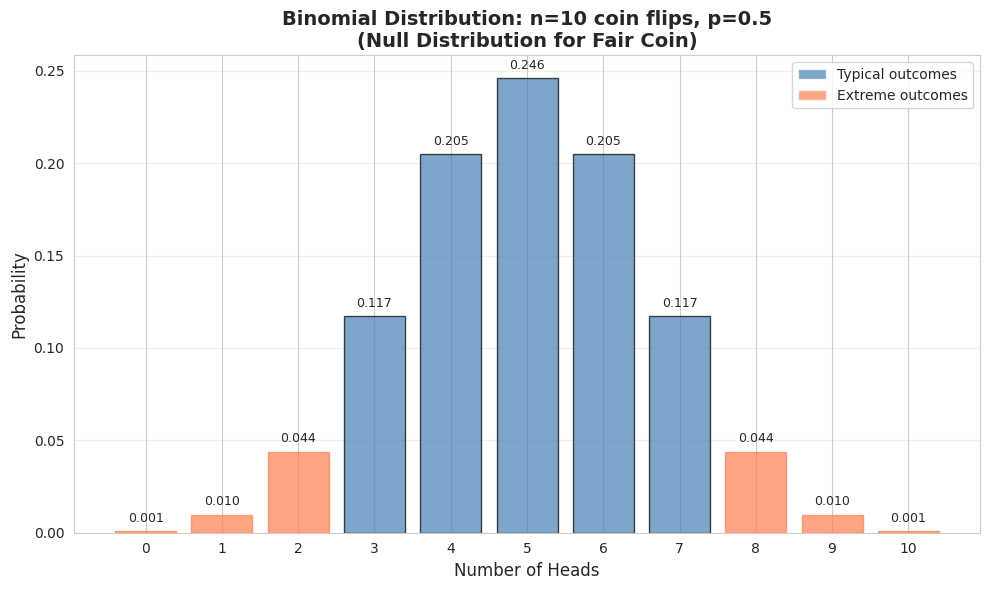

In [2]:
# Fair coin, binomial test
n = 10  # Number of coin flips
p = 0.5  # Probability of heads for a fair coin

# Calculate and display the probability of getting k heads in n flips
# pmf = probability mass function (for discrete distributions)
for k in range(11):  # k can range from 0 to 10 heads
    proba = binom.pmf(k=k, n=n, p=p)  # P(X = k) where X ~ Binomial(n, p)
    print(f"The probability of getting {k} head(s) is: {proba:5.3f}")

# Create a visualization of the binomial distribution
fig, ax = plt.subplots(figsize=(10, 6))

# Calculate probabilities for all possible outcomes
k_values = np.arange(0, n+1)
probabilities = [binom.pmf(k, n, p) for k in k_values]

# Create bar plot with seaborn styling
bars = ax.bar(k_values, probabilities, color='steelblue', edgecolor='black', alpha=0.7)

# Highlight extreme outcomes (potential rejection regions for two-tailed test)
for i, (k, prob) in enumerate(zip(k_values, probabilities)):
    if k <= 2 or k >= 8:  # Extreme outcomes
        bars[i].set_color('coral')
        bars[i].set_alpha(0.7)

# Styling
ax.set_xlabel('Number of Heads', fontsize=12)
ax.set_ylabel('Probability', fontsize=12)
ax.set_title(f'Binomial Distribution: n={n} coin flips, p={p}\n(Null Distribution for Fair Coin)',
             fontsize=14, fontweight='bold')
ax.set_xticks(k_values)
ax.grid(True, alpha=0.3, axis='y')

# Add text annotations for probabilities
for k, prob in zip(k_values, probabilities):
    ax.text(float(k), float(prob) + 0.005, f'{prob:.3f}', ha='center', fontsize=9)

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='steelblue', alpha=0.7, label='Typical outcomes'),
                   Patch(facecolor='coral', alpha=0.7, label='Extreme outcomes')]
ax.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()

### Example 2: IQ Test - One-Sample Test with Normal Distribution

#### Scenario
Suppose we want to test whether a group of students have a higher IQ than the general population. We know:
- The general population has a mean IQ of 100 with a standard deviation of 15
- We have a sample of n=10 students from the program
- We want to test if their mean IQ is significantly higher than 100

#### Hypotheses
- **Null Hypothesis ($H_0$)**: The average IQ of the students is the same as the general population (μ = 100)
- **Alternative Hypothesis ($H_a$)**: The average IQ of the students is higher than the general population (μ > 100, specifically we'll consider μ = 105)
- **Significance Level**: α = 0.05 (5% chance of Type I error)

#### Key Concepts Illustrated
1. **Critical Value**: The threshold value that separates the rejection region from the non-rejection region
2. **Power of the Test**: The probability of correctly rejecting a false null hypothesis (1 - β, where β is the Type II error rate)

Below, we visualize both distributions:
- **Blue curve**: Null distribution (sampling distribution of the mean if $H_0$ is true)
- **Red curve**: Alternative distribution (sampling distribution if $H_a$ is true with μ = 105) 

Critical value: 107.802
Power of the test: 0.277 (27.7%)
This means we have a 27.7% chance of detecting the effect if it truly exists.


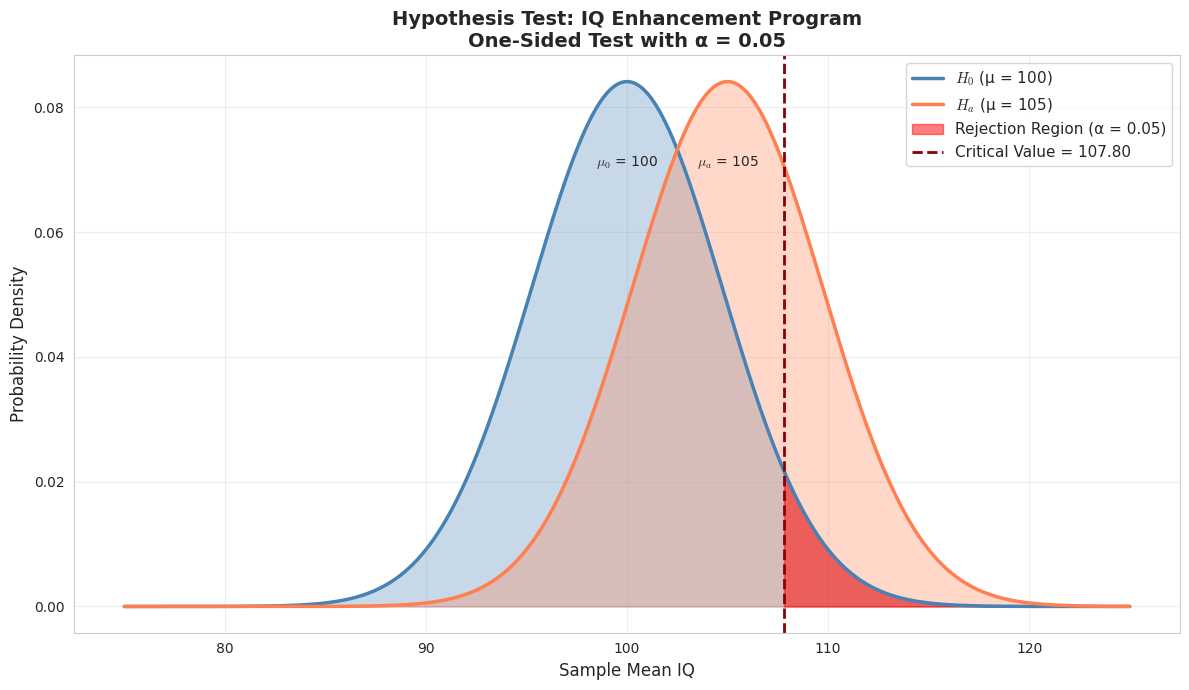

In [3]:
# IQ example - One-sided test
n = 10  # Sample size
mu_0 = 100  # Population mean under null hypothesis
mu_a = 105  # Population mean under alternative hypothesis (effect size we want to detect)
sigma = 15  # Population standard deviation
alpha = 0.05  # Type I error rate (significance level)

# Create figure with seaborn styling
fig, ax = plt.subplots(figsize=(12, 7))

# Create x-axis values for plotting
x_range = np.arange(75, 125, 0.001)
standard_error = np.sqrt(sigma**2 / n)

# Plot the null distribution (H_0: μ = 100) with shaded rejection region
y_null = norm.pdf(x_range, loc=mu_0, scale=standard_error)
ax.plot(x_range, y_null, color='steelblue', linewidth=2.5, label='$H_0$ (μ = 100)')
ax.fill_between(x_range, y_null, alpha=0.3, color='steelblue')

# Plot the alternative distribution (H_a: μ = 105)
y_alt = norm.pdf(x_range, loc=mu_a, scale=standard_error)
ax.plot(x_range, y_alt, color='coral', linewidth=2.5, label='$H_a$ (μ = 105)')
ax.fill_between(x_range, y_alt, alpha=0.3, color='coral')

# Find the critical value for one-sided test (right-tailed)
x_critical = norm.ppf(q=(1 - alpha), loc=mu_0, scale=standard_error)

# Shade the rejection region
x_reject = x_range[x_range >= x_critical]
y_reject = norm.pdf(x_reject, loc=mu_0, scale=standard_error)
ax.fill_between(x_reject, y_reject, alpha=0.5, color='red', label=f'Rejection Region (α = {alpha})')

# Calculate power: probability of rejecting H_0 when H_a is true
power = norm.sf(x=x_critical, loc=mu_a, scale=standard_error)

# Add vertical line at critical value
ax.axvline(x=float(x_critical), color='darkred', linestyle='--', linewidth=2,
           label=f'Critical Value = {x_critical:.2f}')

# Styling
ax.set_xlabel('Sample Mean IQ', fontsize=12)
ax.set_ylabel('Probability Density', fontsize=12)
ax.set_title('Hypothesis Test: IQ Enhancement Program\nOne-Sided Test with α = 0.05', fontsize=14, fontweight='bold')
ax.legend(loc='upper right', fontsize=11)
ax.grid(True, alpha=0.3)

# Add text annotations
ax.text(mu_0, ax.get_ylim()[1]*0.8, f'$\\mu_0$ = {mu_0}', horizontalalignment='center', fontsize=10)
ax.text(mu_a, ax.get_ylim()[1]*0.8, f'$\\mu_a$ = {mu_a}', horizontalalignment='center', fontsize=10)

print(f"Critical value: {x_critical:5.3f}")
print(f"Power of the test: {power:5.3f} ({power*100:.1f}%)")
print(f"This means we have a {power*100:.1f}% chance of detecting the effect if it truly exists.")

plt.tight_layout()
plt.show()

In [4]:
# Calculate the p-value for a specific observed sample mean
test_statistic = 110  # Observed sample mean IQ

# p-value: probability of observing a sample mean of 110 or higher
# if the null hypothesis (μ = 100) is true
# sf = survival function, gives P(X > test_statistic) for one-sided test
p_value = norm.sf(x=test_statistic, loc=100, scale=np.sqrt(15**2 / n))
print(f"The p-value is {p_value:5.3f}.")

The p-value is 0.018.


## 2-Sample Test (Independent Samples t-test)

### Overview
The 2-sample test, a commonly used A/B test, compares the means of two independent groups to determine if they are statistically significantly different from each other. This is one of the most commonly used statistical tests in research.

### When to Use
- Comparing a treatment group to a control group
- The groups must be independent (no paired observations)

### Test Setup
In the following example, we analyze:
- **Group 1**: n₁ = 150 samples, sample mean = 100, sample standard deviation = 10
- **Group 2**: n₂ = 150 samples, sample mean = 103, sample standard deviation = 10

### Hypotheses
- **Null Hypothesis ($H_0$)**: The two population means are equal (μ₁ = μ₂)
- **Alternative Hypothesis ($H_a$)**: The two population means are different (μ₁ ≠ μ₂)
- This is a **two-tailed test** because we're testing for any difference, not a specific direction

### Test Statistic
The test statistic for the 2-sample t-test is:
$$t = \frac{\bar{x}_1 - \bar{x}_2}{ \sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}.$$


For large samples (n > 30), the test statistic approximately follows a standard normal distribution.

Critical values: ±1.960
Test statistic: 2.598
p-value: 0.0094

Decision: Reject H_0 at α = 0.05 level
Since the test statistic falls in the rejection region, we have evidence that the two groups have different means.


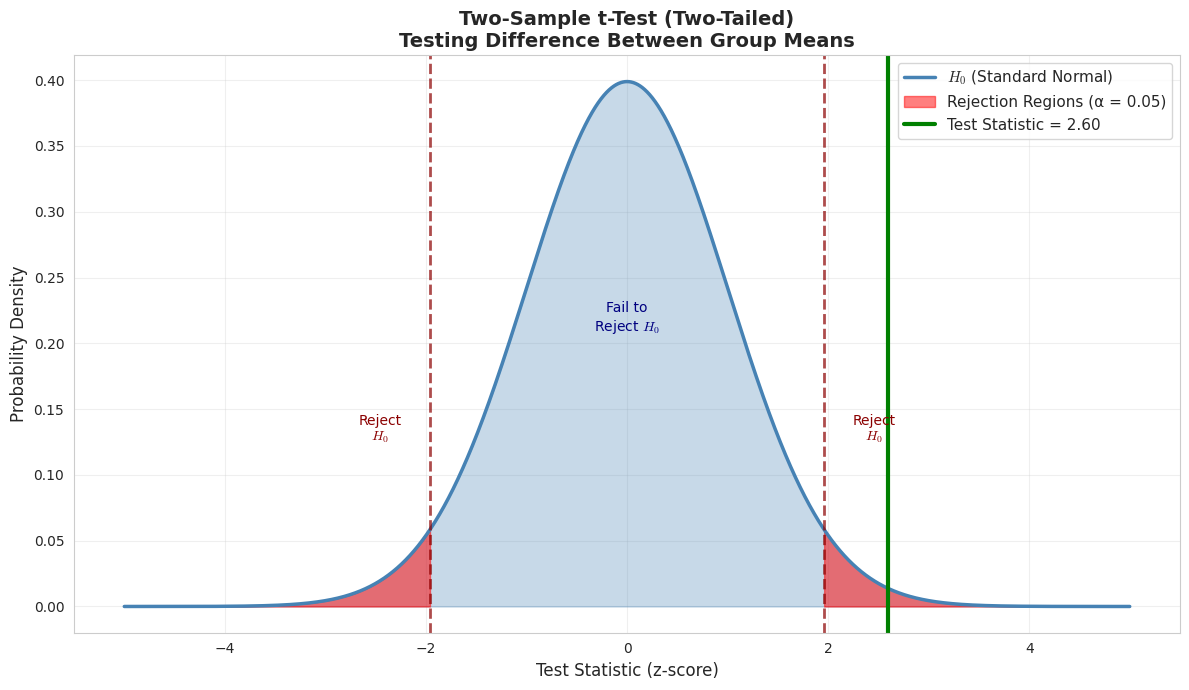

In [5]:
# 2-sample test comparing two independent groups
# Group 1 statistics
x_mean = 100  # Sample mean of group 1
s_x = 10      # Sample standard deviation of group 1
n_x = 150     # Sample size of group 1

# Group 2 statistics
y_mean = 103  # Sample mean of group 2
s_y = 10      # Sample standard deviation of group 2
n_y = 150     # Sample size of group 2

# Calculate the difference between means
delta = y_mean - x_mean

# Significance level for two-tailed test
alpha = 0.05

# Calculate pooled standard error
# This combines the variability from both samples
s_pool = np.sqrt(s_x**2 / n_x + s_y**2 / n_y)

# Calculate test statistic (z-score for large samples)
t_stat = delta / s_pool

# Calculate p-value for two-tailed test
p_value = 2 * norm.sf(abs(t_stat))

# Create figure with seaborn styling
fig, ax = plt.subplots(figsize=(12, 7))

# Create range for plotting standard normal distribution
z_range = np.arange(-5, 5, 0.001)
y_values = norm.pdf(z_range, loc=0, scale=1)

# Plot the null distribution with filled area
ax.plot(z_range, y_values, color='steelblue', linewidth=2.5, label='$H_0$ (Standard Normal)')
ax.fill_between(z_range, y_values, alpha=0.3, color='steelblue')

# Find critical values for two-tailed test
z_critical_upper = norm.ppf(q=(1 - alpha / 2))
z_critical_lower = -z_critical_upper

# Shade rejection regions
z_reject_upper = z_range[z_range >= z_critical_upper]
y_reject_upper = norm.pdf(z_reject_upper, loc=0, scale=1)
ax.fill_between(z_reject_upper, y_reject_upper, alpha=0.5, color='red')

z_reject_lower = z_range[z_range <= z_critical_lower]
y_reject_lower = norm.pdf(z_reject_lower, loc=0, scale=1)
ax.fill_between(z_reject_lower, y_reject_lower, alpha=0.5, color='red', label=f'Rejection Regions (α = {alpha})')

# Add vertical lines for critical values
ax.axvline(x=float(z_critical_upper), color='darkred', linestyle='--', linewidth=2, alpha=0.7)
ax.axvline(x=float(z_critical_lower), color='darkred', linestyle='--', linewidth=2, alpha=0.7)

# Add test statistic line
ax.axvline(x=t_stat, color='green', linewidth=3, label=f'Test Statistic = {t_stat:.2f}')

# Styling
ax.set_xlabel('Test Statistic (z-score)', fontsize=12)
ax.set_ylabel('Probability Density', fontsize=12)
ax.set_title('Two-Sample t-Test (Two-Tailed)\nTesting Difference Between Group Means', fontsize=14, fontweight='bold')
ax.legend(loc='upper right', fontsize=11)
ax.grid(True, alpha=0.3)

# Add annotations
ax.text(0, ax.get_ylim()[1]*0.5, 'Fail to\nReject $H_0$', horizontalalignment='center', fontsize=10, color='navy')
ax.text(float(z_critical_upper) + 0.5, ax.get_ylim()[1]*0.3, 'Reject\n$H_0$', horizontalalignment='center', fontsize=10, color='darkred')
ax.text(float(z_critical_lower) - 0.5, ax.get_ylim()[1]*0.3, 'Reject\n$H_0$', horizontalalignment='center', fontsize=10, color='darkred')

print(f"Critical values: ±{z_critical_upper:5.3f}")
print(f"Test statistic: {t_stat:5.3f}")
print(f"p-value: {p_value:.4f}")
print(f"\nDecision: {'Reject H_0' if abs(t_stat) > z_critical_upper else 'Fail to reject H_0'} at α = {alpha} level")
print("Since the test statistic falls in the rejection region, we have evidence that the two groups have different means.")

plt.tight_layout()
plt.show()

## Multiple Hypothesis Testing

### The Problem of Multiple Comparisons

Multiple hypothesis testing refers to situations where several statistical tests are performed simultaneously on the same dataset. This is increasingly common in modern data analysis.

### The Multiple Testing Problem

#### Increased Type I Error Rate
When performing multiple tests, the probability of making at least one Type I error (false positive) increases dramatically. This is known as the **family-wise error rate (FWER)**.

For m independent tests, each with significance level α:
- Probability of no Type I errors: $(1 - \alpha)^m$
- Probability of at least one Type I error: $1 - (1 - \alpha)^m$

#### Example
If you perform 100 independent tests with α = 0.05:
- Expected number of false positives: 100 × 0.05 = 5
- Probability of at least one false positive: $1 - (0.95)^{100} \approx 0.994$ (99.4%!)

### Solutions to Multiple Testing
Common approaches include:
1. **Bonferroni Correction**: Adjust α by dividing by the number of tests (α/m)
2. **False Discovery Rate (FDR)**: Control the expected proportion of false discoveries
3. **Permutation Testing**: Empirically estimate the null distribution

### Numerical Demonstration of Multiple Testing Problem

To illustrate the multiple testing problem, we'll perform a simulation:

#### Experimental Setup
1. **Create two identical populations**: Both Group A and Group B are drawn from the same standard normal distribution N(0,1)
2. **Sample size**: 10,000 observations per group
3. **Number of tests**: 100 independent 2-sample t-tests
4. **Null hypothesis for each test**: The two groups have the same mean (which is true by design)

#### What to Expect
Since both groups come from the same distribution:
- All null hypotheses are true
- Any significant result (p < 0.05) is a Type I error (false positive)
- With α = 0.05 and 100 tests, we expect approximately 5 false positives

#### Key Insight
This demonstrates that even when there is no real effect, multiple testing can produce "significant" results purely by chance. This is why correction methods are crucial when conducting multiple comparisons.

In [6]:
# Demonstration of multiple hypothesis testing problem
np.random.seed(42)  # For reproducibility
n_samples = 10_000  # Large sample size

# Create two groups from identical distributions (standard normal N(0,1))
# Both groups have the same true mean (0) and variance (1)
group_A = np.random.normal(size=n_samples)
group_B = np.random.normal(size=n_samples)

# First, test if the entire groups are different (they shouldn't be)
# This single test should not find a significant difference
t, p_value = ttest_ind(a=group_A, b=group_B)
print(f"The p-value is {p_value:5.3f}.")
print("Decision: we will not reject the null hypothesis, i.e. we have no evidence that the two groups are different (having different means).")


The p-value is 0.269.
Decision: we will not reject the null hypothesis, i.e. we have no evidence that the two groups are different (having different means).


In [7]:
# Simulate multiple testing by artificially creating subgroups
# Assign arbitrary labels (1,000) to each sample cyclically
# This creates 1,000 artificial "experiments" from the same data
n_labels = 1_000
group_A_labeled = [(i % n_labels, x) for i, x in enumerate(group_A)]
group_B_labeled = [(i % n_labels, x) for i, x in enumerate(group_B)]

# Run 1,000 independent t-tests, one for each label
# Each test compares subset of group A with same label to subset of group B
p_values = []
t_statistics = []
for i in tqdm(range(n_labels)):
    # Extract samples with label i from both groups
    # Each subset has approximately n_samples/n_labels = 100 observations
    t_statistic, p_value = ttest_ind(
        a=[x for label, x in group_A_labeled if label == i],
        b=[x for label, x in group_B_labeled if label == i]
    )
    t_statistics.append(t_statistic)
    p_values.append(p_value)

100%|██████████| 1000/1000 [00:00<00:00, 1732.79it/s]


Smallest p_values are:
  1. 0.003
  2. 0.004
  3. 0.005
  4. 0.005
  5. 0.006



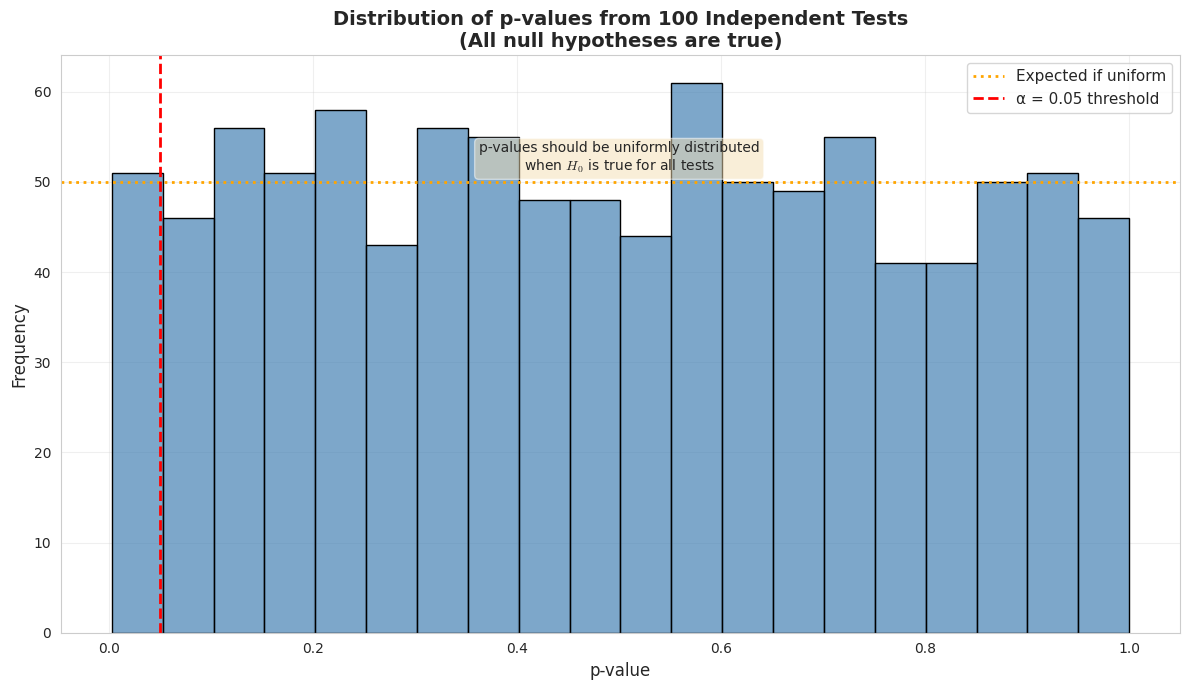


🚨 MULTIPLE TESTING RESULTS
Number of 'significant' results (p < 0.05): 51
These are ALL FALSE POSITIVES since both groups are identical!
Expected false positives: 50.0
Actual false positive rate: 5.1%


In [8]:
# Analyze the results of multiple testing
print("Smallest p_values are:")
# Format p-values nicely for display
smallest_p_values = sorted(p_values)[:5]
for i, p_val in enumerate(smallest_p_values, 1):
    print(f"  {i}. {p_val:5.3f}")
print()

# Create figure with seaborn styling
fig, ax = plt.subplots(figsize=(12, 7))

# Visualize the distribution of p-values using seaborn histogram
# Under the null hypothesis, p-values should be uniformly distributed
sns.histplot(data=p_values, bins=20, kde=False, ax=ax, color='steelblue', edgecolor='black', alpha=0.7)

# Add reference line for uniform distribution expectation
expected_count = len(p_values) / 20  # Expected count per bin if uniform
ax.axhline(y=expected_count, color='orange', linestyle=':', linewidth=2, label='Expected if uniform')

# Add significance threshold
ax.axvline(x=0.05, color='red', linestyle='--', linewidth=2, label='α = 0.05 threshold')

# Styling
ax.set_xlabel('p-value', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title('Distribution of p-values from 100 Independent Tests\n(All null hypotheses are true)',
             fontsize=14, fontweight='bold')
ax.legend(loc='upper right', fontsize=11)
ax.grid(True, alpha=0.3)

# Add text annotation about uniformity
ax.text(0.5, ax.get_ylim()[1]*0.8,
        'p-values should be uniformly distributed\nwhen $H_0$ is true for all tests',
        horizontalalignment='center', fontsize=10, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

# Count and highlight false positives
n_significant = sum(p < 0.05 for p in p_values)
print(f"\n{'='*50}")
print(f"🚨 MULTIPLE TESTING RESULTS")
print(f"{'='*50}")
print(f"Number of 'significant' results (p < 0.05): {n_significant}")
print(f"These are ALL FALSE POSITIVES since both groups are identical!")
print(f"Expected false positives: {n_labels * 0.05:.1f}")
print(f"Actual false positive rate: {n_significant/n_labels:.1%}")
print(f"{'='*50}")